In [15]:
import numpy as np
import statsmodels.api as sml
import pandas as pd
import matplotlib.pyplot as plt

### Snippet 5.1 T-Value of a Linear Trend

In [12]:
def tValLinR(close):
    #tValue from a linear trend
    
    x = np.ones((close.shape[0], 2))
    x[:, 1] = np.arange(close.shape[0])
    ols = sml.OLS(close, x).fit()
    return ols.tvalues[1]

### Snippet 5.2 Implementation of The Trend-Scanning Method

In [13]:
def getBinsFromTrend(molecule, close, span) :
    
    
    """
    
    INPUT
    molecule : datetime index
    close : series of close price
    span : L value
    
    
    OUTPUT
    t1 : End time for the identified tread
    tVal : t-value associated with the estimated trend coefficient
    bin : Sign of the trend
    
    """
    
    
    out = pd.DataFrame(index = molecule, columns = ['t1','tVal','bin'])
    
    hrzns = range(*span) # large L
    
    for dt0 in molecule :
        df0 = pd.Series()
        iloc0 = close.index.get_loc(dt0)
        if iloc0 + max(hrzns) > close.shape[0] :
            continue
        
        for hrzn in hrzns :
            dt1 = close.index[iloc0 + hrzn - 1]
            df1 = close.loc[dt0:dt1]
            df0.loc[dt1] = tValLinR(df1.values)
            
        dt1 = df0.replace([-np.inf, np.inf, np.nan], 0).abs().idxmax()
        out.loc[dt0, ['t1','tVal','bin']] = df0.index[-1], df0[dt1], np.sign(df0[dt1])  #prevent leakage
    
    out['t1'] = pd.to_datetime(out['t1'])
    out['bin'] = pd.to_numeric(out['bin'], downcast='signed')
    
    return out.dropna(subset=['bin'])



### Snippet 5.3 Testing The Trend-Scanning Labeling Algorithm

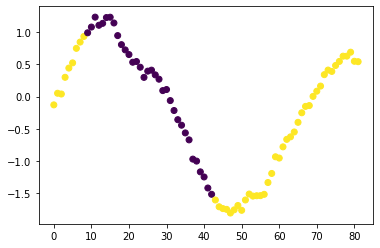

In [19]:
df0 = pd.Series(np.random.normal(0, 0.1, 100)).cumsum()

df0 += np.sin(np.linspace(0, 10, df0.shape[0]))

df1 = getBinsFromTrend(df0.index, df0, [3,20,1])

plt.scatter(df1.index, df0.loc[df1.index].values, c=df1['bin'].values, cmap='viridis')

plt.savefig('fig5.1.png')

plt.clf()
plt.close()

plt.scatter(df1.index, df0.loc[df1.index].values, c=df1['bin'].values, cmap = 'viridis')